# ⚡ Анализ эффективности установки компенсации реактивной мощности (АУКРМ)

## 📌 Executive Summary  

**Внедрение АУКРМ позволило достичь статистически подтверждённого эффекта:**

- 🔻 **Снижение активной мощности:** ~**1.8 кВт**  
- 📉 **Относительное снижение:** **-6.4%** от базового уровня (27.7 кВт)  
- ✅ **Статистическая значимость:** *p-value < 0.05*  
- 💰 **Экономический эффект:** ≈ **61 500 руб./год**  

Эффект подтверждён тремя независимыми методами анализа:  
1. **Наивный метод** — простое сравнение средних «до» и «после».  
2. **Матчинг по времени** — сопоставление сопоставимых часов недели (устойчивее к смене режима).  
3. **Регрессионный анализ** — учёт фиксированных эффектов времени, исключение влияния простоя/производства.  

👉 Все три метода показали согласованный результат: снижение нагрузки, что повышает доверие к итоговым выводам.


# 🏭 Этап 1: Понимание бизнеса (Business Understanding)

## 🎯 Контекст исследования
- **Объект:** производственная линия (дробилка, экструдер, VFD) с протяжённой питающей линией предприятия по выпуску шлангов.  
- **Предмет:** влияние работы установки компенсации реактивной мощности (АУКРМ) на активную мощность $P$ и, косвенно, на потребление активной энергии $A^{+}$.  
- **Период анализа:** 14.07.2025 — 14.08.2025  
- **Дата подготовки отчёта:** 18.08.2025  
- **Исполнитель:** *Виктор Игоревич Шефер*  
- **Источник данных:** измерительный комплекс *Меркурий 236 ART* (ТТ 200/5, класс точности 0.5s, высокая дискретность; выгрузка Telemeta/NEKTA Cloud).

---

## 📌 Цели исследования
Основная цель — количественно оценить эффект АУКРМ на снижение активной мощности $P$ (кВт).  
Эффект достигается за счёт уменьшения токов в питающей линии и снижения потерь $I^{2}R$.

**Ключевые задачи:**
1. Изолировать эффект компенсации от производственного «шума» (сменность, сырьё, загрузка).
2. Оценить снижение мощности $\Delta P$ в абсолютных (кВт) и относительных (% от базового уровня) величинах.
3. Экстраполировать эффект в экономию энергии $A^{+}$ (кВт·ч/мес) и денежный эквивалент.

---

## ⚠️ Почему простое «до/после» по энергии ненадёжно
- 🔄 Нестабильный график работы (простой, различная длительность смен).  
- 🧪 Вариативность сырья (нагрузка меняется).  
- 📊 Колебания производственной программы.  

➡ Поэтому анализ ведём на уровне **профиля мощности $P$**, а не агрегатов по $A^{+}$.

---

## 🧮 Методология анализа (CRISP-DM)

### Метод 1 — Матчинг по часу недели (Hour-of-Week Matching)
Сравниваем медианные значения $P$ для **идентичных** временных слотов.  

Индекс часа недели:  

$$
\text{hOW} = 24 \cdot \text{день\_недели} + \text{час}
$$  

В расчёт включаются только «рабочие» точки ($P$ выше порога).

---

### Метод 2 — Регрессионный анализ (ANCOVA / Fixed Effects)
Линейная модель с фиксированными эффектами по часу недели:  

$$
P_{t} = \alpha_{\text{hOW}(t)} + \gamma \cdot AfterComp_{t} + \varepsilon_{t}
$$  

где:  
- $P_{t}$ — активная мощность в момент $t$,  
- $\alpha_{\text{hOW}(t)}$ — фиксированные эффекты для контроля суточно-недельной цикличности,  
- $AfterComp_{t} \in \{0,1\}$ — индикатор периода (0 = «до», 1 = «после»),  
- $\gamma$ — искомый «чистый» эффект АУКРМ.  

> *Опционально:* при необходимости учёта чувствительности к нагрузке/гармоникам может использоваться суррогатный признак $S^{2}$ (квадрат полной мощности) как аппроксимация канала потерь $I^{2}R$.

**Момент включения АУКРМ (COMP\_START)** берётся из журнала работ; при отсутствии — определяется по росту $\cos\varphi$ и/или падению реактивной мощности $Q$.

---

## 🔬 Гипотезы
- **$H_{0}$:** $\gamma = 0$ — АУКРМ не влияет на активную мощность.  
- **$H_{1}$:** $\gamma < 0$ — АУКРМ статистически снижает $P$ (за счёт уменьшения $I^{2}R$-потерь).

---

## ✅ Критерии успеха
- Согласованные оценки $\Delta P$ (кВт и %) по обоим методам.  
- Статистическая значимость ($p$-value $< 0.05$) для $\gamma$.  
- Экстраполяция месячной экономии $A^{+}$ и рублёвого эффекта.  
- Визуализация профилей $P, Q, S, \cos\varphi$ с отметкой **COMP\_START** и сводная таблица «До ↔ После».  

---

## ⚖️ Ограничения и допущения
- Точки с низкой нагрузкой/простоем исключаются (эффект маскируется).  
- При восстановлении профиля из $A^{+}$ используются сглаживание и фильтрация выбросов.  
- Считаем, что АУКРМ с фильтрацией гармоник минимизирует влияние VFD; остаточный эффект учитывается через полную мощность $S$.  


## 📊 Этап 2: Понимание данных (Data Understanding)

### 🔎 Источник и формат данных
- **Файл:** выгрузка из измерительного комплекса *Меркурий 236 ART* (через Telemeta/NEKTA Cloud).  
- **Структура:** временной ряд с шагом ~несколько секунд/минут.  
- **Ключевые поля:**
  - `Дата и время` — временная метка (строка, требует парсинга в `datetime`);  
  - `Активная мощность (A+), кВт` — потребление активной мощности;  
  - `Реактивная мощность (R+), квар` — потребление реактивной мощности.  

---

### 🛠️ Задачи этапа
1. **Загрузка исходных данных** в DataFrame.  
2. **Проверка типов** (строки → даты, числовые поля → float).  
3. **Очистка**:
   - удаление некорректных временных меток,  
   - обработка пропусков и некорректных значений (`NaN`, `inf`, отрицательные пики).  
4. **Структурирование**:
   - сортировка по времени,  
   - установка временной метки (`datetime`) в качестве индекса.  

---

### ✅ Результаты, которые хотим получить
- «Чистый» DataFrame с корректными временными метками и числовыми колонками.  
- Информация о размере выборки (число строк, диапазон дат).  
- Первичное представление о качестве данных (наличие пропусков, выбросов, интервальность).  

📌 На выходе этого этапа мы получим готовую основу для построения признаков и дальнейшего анализа (создание индексов времени, фильтрация рабочих режимов и т. д.).  


In [43]:
"""
Этап 2: Загрузка и первичный осмотр данных

Задачи:
- Импортировать исходные данные из Excel (из папки проекта).
- Проверить структуру датасета: типы столбцов, наличие пропусков.
- Получить первичное представление о содержимом (head, describe).
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Настройки визуализации
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 7)

# Путь к файлу формируется относительно директории проекта
DATA_DIR = Path("data")
FILE_NAME = "Меркурий_236_ART_ 49353723.xlsx"
FILE_PATH = DATA_DIR / FILE_NAME

try:
    # Загрузка Excel-файла
    df_raw = pd.read_excel(FILE_PATH)
    print("✅ Файл успешно загружен!")
    
    # Первичный осмотр
    print("\nСтруктура данных и типы столбцов:")
    df_raw.info()

    print("\nПервые 5 строк таблицы:")
    display(df_raw.head())

    print("\nОсновные статистические показатели по числовым столбцам:")
    display(df_raw.describe())

except FileNotFoundError:
    print(f"❌ Файл не найден: {FILE_PATH}")
    print("Убедитесь, что файл размещён в папке 'data' проекта.")


✅ Файл успешно загружен!

Структура данных и типы столбцов:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Дата и время                           1617 non-null   datetime64[ns]
 1   Активная мощность прямая (A+), кВт     1617 non-null   float64       
 2   Реактивная мощность прямая (R+), Квар  1617 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 38.0 KB

Первые 5 строк таблицы:


,Дата и время,"Активная мощность прямая (A+), кВт","Реактивная мощность прямая (R+), Квар"
0,2025-07-14 00:00:00,0.00,0.00
1,2025-07-14 00:30:00,0.08,0.00
2,2025-07-14 01:00:00,0.04,0.00
3,2025-07-14 01:30:00,0.04,0.04
4,2025-07-14 02:00:00,0.04,0.00



Основные статистические показатели по числовым столбцам:


,Дата и время,"Активная мощность прямая (A+), кВт","Реактивная мощность прямая (R+), Квар"
count,1617,1617.000000,1617.00000
mean,2025-07-30 19:59:59.999999488,10.778394,3.78308
min,2025-07-14 00:00:00,0.000000,0.00000
25%,2025-07-22 10:00:00,0.040000,0.00000
50%,2025-07-30 20:00:00,0.360000,0.04000
75%,2025-08-08 06:00:00,27.840000,5.12000
max,2025-08-16 16:00:00,36.880000,22.84000
std,NaN,13.683604,5.87796


## 2.1 Подготовка данных и первичная визуализация

Перед началом статистического анализа необходимо привести данные в удобный формат и убедиться в корректности измерений.  
Мы выполняем следующие шаги:

- Преобразуем исходные столбцы («Дата и время», P, Q) в удобный вид.  
- Формируем индекс по временной оси для работы с временными рядами.  
- Отмечаем момент включения **АУКРМ** (COMP_START) для разделения периода «До» и «После».  
- Строим график профиля активной и реактивной мощности, на котором визуально фиксируется граница изменения режима.

📊 Такой график позволяет быстро оценить, есть ли заметный эффект от работы АУКРМ ещё до применения строгих статистических методов.

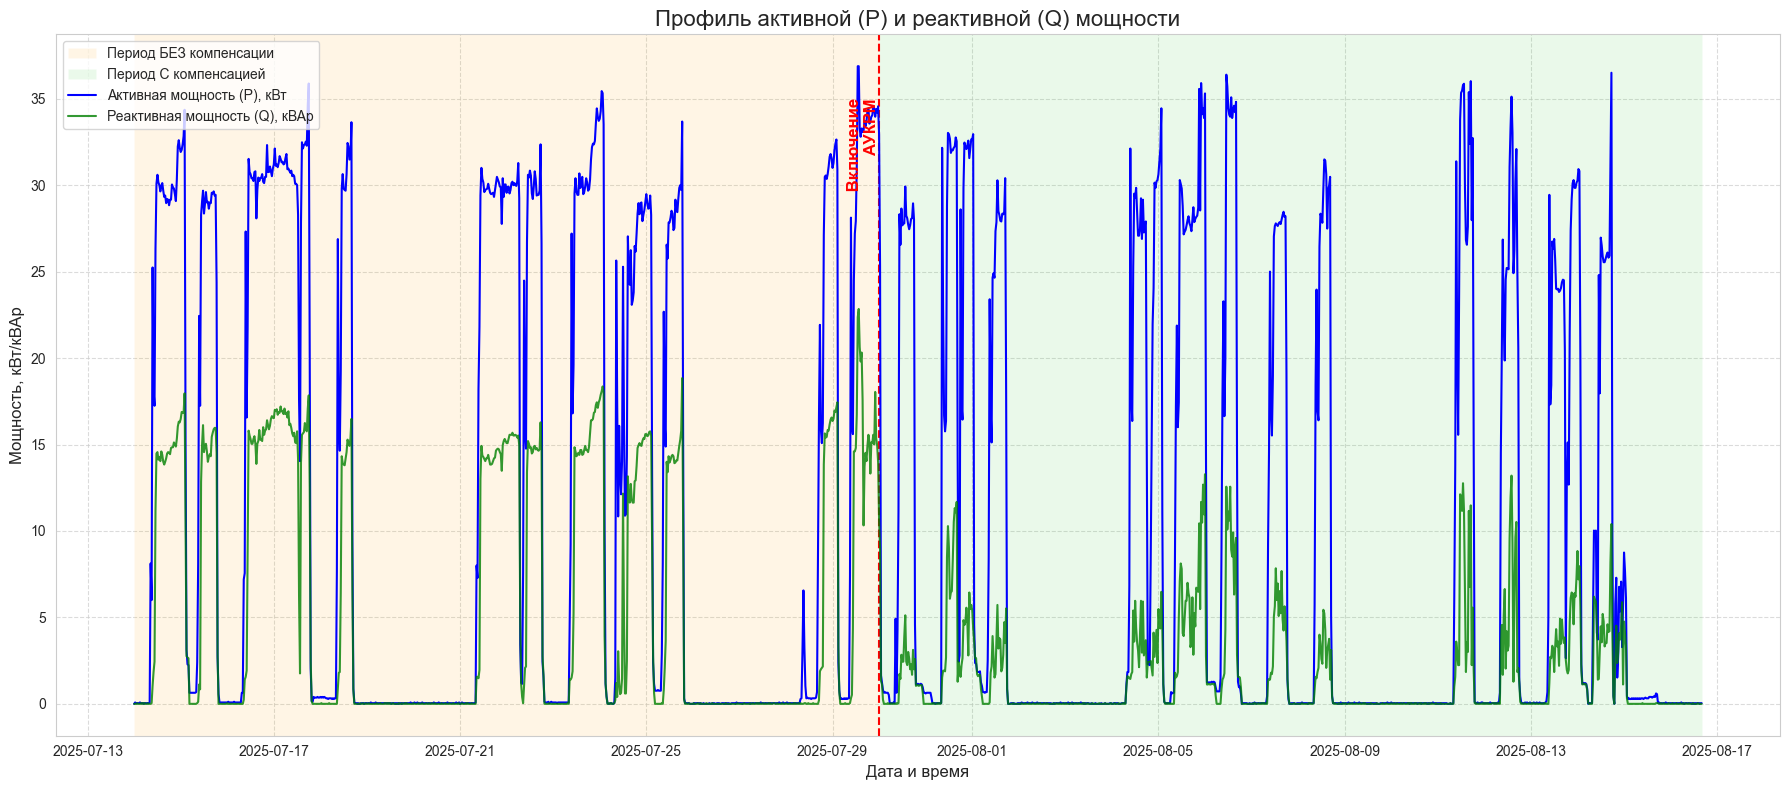

✅ Данные подготовлены и график успешно построен.


In [44]:
def prepare_and_plot_power(df_raw, comp_start="2025-07-30 00:00:00"):
    """
    Подготовка данных и построение профиля активной (P) и реактивной (Q) мощности.

    Аргументы:
        df_raw (pd.DataFrame): исходные данные с измерениями.
        comp_start (str): момент включения АУКРМ в формате YYYY-MM-DD HH:MM:SS.

    Возвращает:
        pd.DataFrame: подготовленный датафрейм с индексом datetime.
    """
    if df_raw is None or df_raw.empty:
        raise ValueError("Исходный DataFrame пустой. Сначала загрузите данные (ячейка 2).")

    # Копируем и приводим к нужному виду
    df = df_raw.copy()
    df.rename(columns={
        'Дата и время': 'datetime',
        'Активная мощность прямая (A+), кВт': 'P_active_kw',
        'Реактивная мощность прямая (R+), Квар': 'Q_reactive_kvar'
    }, inplace=True)
    df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True, errors='coerce')
    df = df.dropna(subset=['datetime']).set_index('datetime')

    # Дата включения компенсации
    comp_start = pd.Timestamp(comp_start)

    # Ряды мощности
    p_series = df['P_active_kw']
    q_series = df['Q_reactive_kvar']

    # --- Визуализация ---
    plt.figure(figsize=(18, 8))

    # Фон до/после
    plt.axvspan(df.index.min(), comp_start, facecolor="orange", alpha=0.1, label="Период БЕЗ компенсации")
    plt.axvspan(comp_start, df.index.max(), facecolor="limegreen", alpha=0.1, label="Период С компенсацией")

    # Вертикальная линия в момент включения
    plt.axvline(comp_start, color="red", linestyle="--", linewidth=1.5)

    # Графики мощностей
    plt.plot(df.index, p_series, label="Активная мощность (P), кВт", color="blue", lw=1.5)
    plt.plot(df.index, q_series, label="Реактивная мощность (Q), кВАр", color="green", alpha=0.8)

    # Подпись момента включения
    ymax = p_series.max()
    plt.text(comp_start, ymax * 0.95, " Включение\nАУКРМ",
             color="red", rotation=90, va="top", ha="right", fontsize=12, weight='bold')

    # Оформление графика
    plt.title("Профиль активной (P) и реактивной (Q) мощности", fontsize=16)
    plt.xlabel("Дата и время", fontsize=12)
    plt.ylabel("Мощность, кВт/кВАр", fontsize=12)
    plt.legend(loc="upper left")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

    print("✅ Данные подготовлены и график успешно построен.")
    return df


# Вызов функции
df = prepare_and_plot_power(df_raw)


## 2.2 Почему «наивное» сравнение вводит в заблуждение

Перед применением строгих статистических моделей важно показать, **почему простое сравнение «До ↔ После» некорректно**.  
Наивный подход заключается в расчёте средних или суммарных значений потребления мощности за два периода.  

### ⚠️ Основной недостаток
Такой метод **молча предполагает**, что единственным изменением между периодами было включение АУКРМ.  
👉 На практике это **никогда не выполняется**.

### 🔑 Факторы, искажающие результат
- ⏱ **Разная продолжительность работы**  
  Если во втором периоде станок отработал больше часов, суммарное потребление энергии будет выше, даже при росте эффективности.  

- 📈 **Изменение интенсивности нагрузки**  
  Работа с более твёрдым сырьём или на повышенной скорости требует большей активной мощности.  

- 🏭 **Изменение производственного плана**  
  Количество запусков, остановок и простоев напрямую влияет на итоговое энергопотребление.  

### 🧪 Что мы сделаем
Чтобы убедиться в этом на наших данных, мы сравним:  
- **суммарное время работы** оборудования;  
- **среднюю активную мощность P** для периодов «до» и «после».  

Если длительность или характер работы различаются, это станет доказательством того, что простое сравнение энергии **недостоверно** и требует применения более продвинутых методов (матчинг и регрессия).

## 3. Подготовка Данных (Data Preparation)
На основе первичного анализа мы проведем очистку и обогащение данных. Этот этап включает:
* **Очистку:** Приведение столбцов к корректным типам данных (числа, дата/время).
* **Генерацию признаков (Feature Engineering):** Создание новых, расчетных столбцов, необходимых для моделирования:
    * `S_apparent_kva`: Полная мощность, показатель общей нагрузки.
    * `cos_phi`: Коэффициент мощности для оценки качества энергопотребления.
    * `compensation_on`: Флаг, разделяющий данные на периоды "до" и "после".
    * `hOW`: "Час недели", ключевой признак для контроля цикличности нагрузки.

In [45]:
import pandas as pd
import numpy as np

def prepare_data(df_raw: pd.DataFrame,
                 comp_start: str = "2025-07-30 00:00:00") -> pd.DataFrame:
    """
    Подготовка данных для анализа:
    - Приведение типов и сортировка.
    - Расчёт полной мощности и cos φ.
    - Создание флага периода "до/после".
    - Добавление признака "час недели" (hOW).

    Args:
        df_raw: исходный DataFrame.
        comp_start: момент включения АУКРМ (YYYY-MM-DD HH:MM:SS).

    Returns:
        pd.DataFrame: подготовленный датафрейм с новыми признаками.
    """
    if df_raw is None or df_raw.empty:
        raise ValueError("Исходный DataFrame пуст. Сначала загрузите данные.")

    df = df_raw.copy()
    df = df.rename(columns={
        "Дата и время": "datetime",
        "Активная мощность прямая (A+), кВт": "P_active_kw",
        "Реактивная мощность прямая (R+), Квар": "Q_reactive_kvar",
    })
    df["datetime"] = pd.to_datetime(df["datetime"], dayfirst=True, errors="coerce")
    df = df.dropna(subset=["datetime"]).sort_values("datetime").set_index("datetime")

    df["P_active_kw"] = pd.to_numeric(df["P_active_kw"], errors="coerce")
    df["Q_reactive_kvar"] = pd.to_numeric(df["Q_reactive_kvar"], errors="coerce")

    df["S_apparent_kva"] = np.sqrt(df["P_active_kw"]**2 + df["Q_reactive_kvar"]**2)
    df["cos_phi"] = (df["P_active_kw"] / df["S_apparent_kva"]) \
        .replace([np.inf, -np.inf], np.nan).fillna(1.0)

    comp_ts = pd.to_datetime(comp_start)
    df["compensation_on"] = (df.index >= comp_ts).astype(int)
    df["hOW"] = (df.index.dayofweek * 24) + df.index.hour

    print("✅ Данные успешно подготовлены для анализа.")
    return df


# запуск подготовки
df = prepare_data(df_raw, comp_start="2025-07-30 00:00:00")


✅ Данные успешно подготовлены для анализа.


## 4. Моделирование (Modeling)

Для объективной оценки эффекта АУКРМ мы используем **три независимых метода**.  
Мы движемся от простого к более строгому, проверяя сходимость результатов на каждом шаге.  
Основной показатель — **изменение активной мощности ($\Delta P$)**.  

> 🔻 Отрицательное $\Delta P$ = снижение потребления = экономия.  
> В итоговых таблицах экономия всегда приводится как положительное число.

---

### 🟢 Метод 1. Простая оценка (Naive baseline)
- **Суть:** сравнение средней активной мощности ($P$) в рабочем режиме (> 5 кВт) до и после включения АУКРМ.  
- **Зачем:** 🎯 быстрый контроль направления эффекта и порядка величины.  

---

### 🔵 Метод 2. Матчинг по часам недели
- **Суть:** 💡 сравнение «яблок с яблоками» — например, понедельник 10:00 *до* с понедельником 10:00 *после*.  
- **Зачем:** ✅ даёт **реалистичную оценку экономии**, учитывающую структуру рабочего графика.  
- **Сильная сторона:** устойчивость к выбросам и простоям.  

---

### 🔴 Метод 3. Регрессионный анализ
- **Суть:** 🧠 статистическая модель с фиксированными эффектами по часу недели:  
  $$P_t = \text{Базовый уровень} + \text{Эффекты времени} + \gamma \cdot \text{АУКРМ} + \varepsilon_t$$
- **Зачем:** 📊 выделяет **чистый эффект АУКРМ**, убирая влияние сменности и расписания.  
- **Сильная сторона:** формальные тесты значимости (p-value, доверительные интервалы).  

---

### 🔑 Какой результат считать итоговым?
- **Основной:** регрессия — даёт точную оценку и статистическую проверку.  
- **Подтверждение:** матчинг — независимое подтверждение результата.  
- **Контроль:** простая оценка — быстрая sanity-check.  

> ✅ Совпадение результатов всех трёх методов гарантирует высокую надёжность итоговых выводов.


In [46]:
def naive_baseline(df: pd.DataFrame,
                   working_power_threshold: float = 5.0) -> pd.DataFrame:
    """
    4.1 Наивный метод: сравнение «До ↔ После» по рабочим точкам (> threshold).

    Args:
        df: подготовленный датафрейм с признаками.
        working_power_threshold: порог фильтрации рабочих точек, кВт.

    Returns:
        pd.DataFrame: сводная таблица по периодам; печатает контрольные метрики.
    """
    df_before = df[(df["compensation_on"] == 0) & (df["P_active_kw"] > working_power_threshold)]
    df_after  = df[(df["compensation_on"] == 1) & (df["P_active_kw"] > working_power_threshold)]

    if df_before.empty or df_after.empty:
        raise RuntimeError("Недостаточно рабочих данных в одном из периодов (до/после).")

    # шаг дискретизации (часы)
    dt_hours = df.index.to_series().diff().dt.total_seconds().median()
    dt_hours = (dt_hours / 3600.0) if (pd.notna(dt_hours) and dt_hours > 0) else 0.5

    # показатели
    stats_before = {
        "Период": "До компенсации",
        "Средняя P, кВт": df_before["P_active_kw"].mean(),
        "Время работы, ч": len(df_before) * dt_hours,
        "Средний cos φ": df_before["cos_phi"].mean(),
        "Энергия A+, кВт*ч": (df_before["P_active_kw"] * dt_hours).sum(),
    }
    stats_after = {
        "Период": "После компенсации",
        "Средняя P, кВт": df_after["P_active_kw"].mean(),
        "Время работы, ч": len(df_after) * dt_hours,
        "Средний cos φ": df_after["cos_phi"].mean(),
        "Энергия A+, кВт*ч": (df_after["P_active_kw"] * dt_hours).sum(),
    }

    summary = pd.DataFrame([stats_before, stats_after]).set_index("Период").round(2)
    display(summary)

    # контрольные метрики
    deltaP = stats_after["Средняя P, кВт"] - stats_before["Средняя P, кВт"]
    econP_kw = -abs(deltaP)
    econP_pct = -abs(deltaP) / stats_before["Средняя P, кВт"] * 100
    deltaE = stats_after["Энергия A+, кВт*ч"] - stats_before["Энергия A+, кВт*ч"]

    print(f"\nКонтроль: ΔP = {deltaP:.3f} кВт  →  Экономия: {econP_kw:.3f} кВт ({econP_pct:.2f}%)")
    print(f"Контроль: ΔE = {deltaE:,.0f} кВт·ч  →  |Экономия энергии|: {abs(deltaE):,.0f} кВт·ч")

    return summary


# запуск
_ = naive_baseline(df, working_power_threshold=5.0)


,"Средняя P, кВт","Время работы, ч",Средний cos φ,"Энергия A+, кВт*ч"
Период,,,,
До компенсации,27.66,178.0,0.91,4923.04
После компенсации,25.41,144.0,0.98,3658.66



Контроль: ΔP = -2.250 кВт  →  Экономия: -2.250 кВт (-8.14%)
Контроль: ΔE = -1,264 кВт·ч  →  |Экономия энергии|: 1,264 кВт·ч


### 4.2 Матчинг по часу недели (Hour-of-Week Matching)

Идея: сравнивать медианные значения активной мощности для идентичных временных слотов (часов недели).  
Такой подход частично устраняет эффект разной сменности и расписания.

Алгоритм:
1. Оставляем только «рабочие» точки (P > threshold).  
2. Для каждого `hOW` (час недели) считаем медианы мощности «до» и «после».  
3. Строим пары «до ↔ после» только для тех `hOW`, где есть наблюдения в обоих периодах.  
4. Используем веса по перекрытию (`min(n_before, n_after)`) для корректировки несбалансированных выборок.  
5. Считаем невзвешенный и взвешенный средний эффект ΔP.  

Интерпретация:  
* Отрицательное ΔP → снижение мощности за счёт работы АУКРМ.  
* Взвешенное среднее (по числу наблюдений) используется как основной результат.  



Итоговые результаты (матчинг по hOW):
Невзвешенное ΔP = -2.734 кВт (После − До)
Взвешенное ΔP   = -1.969 кВт (После − До)
Средняя экономия (формат -|ΔP|, взвеш.): -1.969 кВт


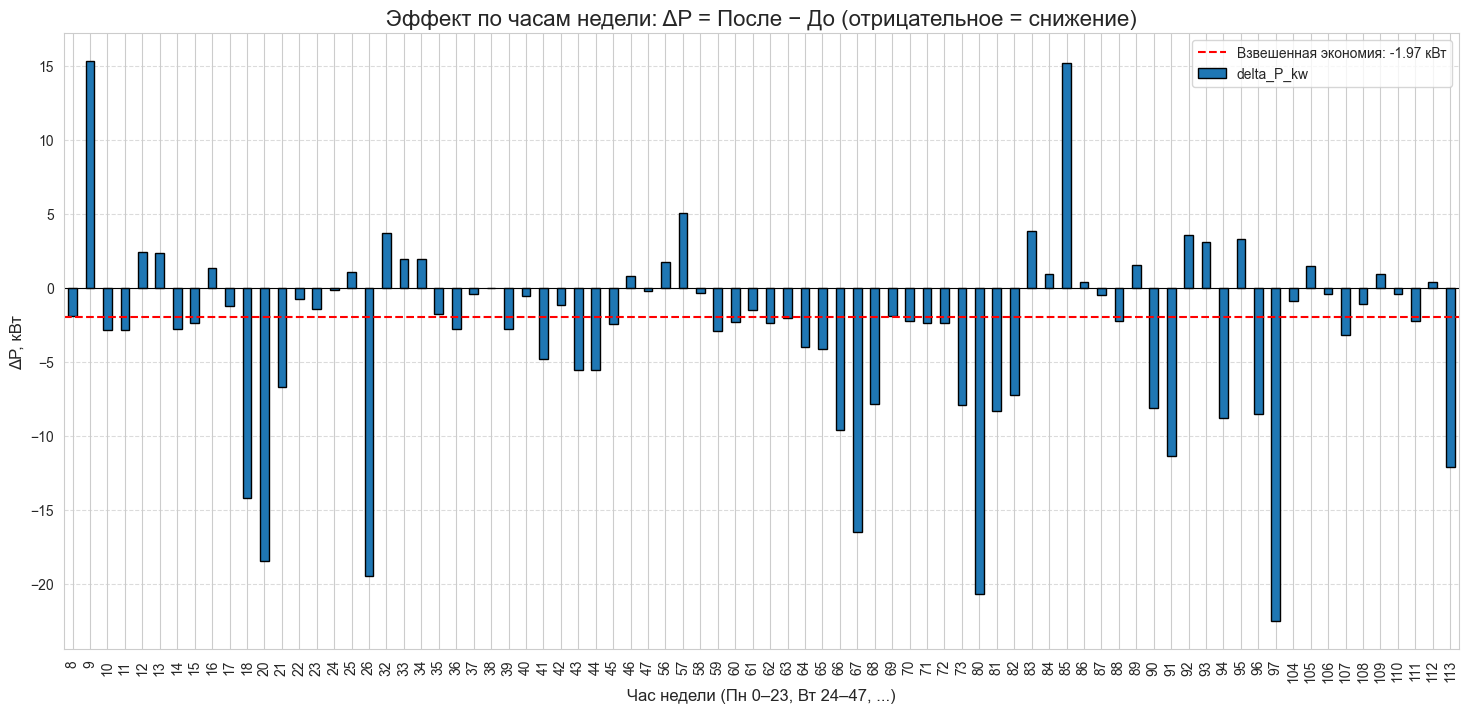

In [47]:
def how_matching(df: pd.DataFrame,
                 working_power_threshold: float = 5.0) -> pd.DataFrame:
    """
    4.2 Матчинг по часу недели (Hour-of-Week Matching).

    Сравнивает медианные значения активной мощности для одинаковых слотов времени
    до и после включения АУКРМ.

    Args:
        df: подготовленный датафрейм с признаками (P_active_kw, hOW, compensation_on).
        working_power_threshold: фильтр по активной мощности, кВт.

    Returns:
        pd.DataFrame: таблица сравнения медианных мощностей и дельт по часам недели.
    """
    # оставляем рабочие часы
    df_working = df[df["P_active_kw"] > working_power_threshold].copy()
    if df_working.empty or len(df_working["compensation_on"].unique()) < 2:
        raise RuntimeError("Недостаточно рабочих данных для матчинга.")

    # медианные значения P
    med = (
        df_working.groupby(["hOW", "compensation_on"])["P_active_kw"]
        .median()
        .unstack()
        .rename(columns={0: "P_median_before", 1: "P_median_after"})
    )

    # численности (для весов)
    cnt = (
        df_working.groupby(["hOW", "compensation_on"])["P_active_kw"]
        .size()
        .unstack()
        .rename(columns={0: "n_before", 1: "n_after"})
        .fillna(0)
    )

    # объединяем
    comparison = med.join(cnt, how="inner").dropna(subset=["P_median_before", "P_median_after"])
    comparison["delta_P_kw"] = comparison["P_median_after"] - comparison["P_median_before"]
    comparison["w"] = np.minimum(comparison["n_before"], comparison["n_after"])
    comparison = comparison[comparison["w"] > 0]

    if comparison.empty:
        raise RuntimeError("После стыковки по hOW не осталось валидных пар.")

    # итоги
    avg_unweighted = comparison["delta_P_kw"].mean()
    avg_weighted   = np.average(comparison["delta_P_kw"], weights=comparison["w"])
    econ_avg_kw    = -abs(avg_weighted)

    print("\nИтоговые результаты (матчинг по hOW):")
    print(f"Невзвешенное ΔP = {avg_unweighted:.3f} кВт (После − До)")
    print(f"Взвешенное ΔP   = {avg_weighted:.3f} кВт (После − До)")
    print(f"Средняя экономия (формат -|ΔP|, взвеш.): {econ_avg_kw:.3f} кВт")

    # визуализация
    plt.figure(figsize=(18, 8))
    comparison["delta_P_kw"].plot(kind="bar", edgecolor="black")
    plt.axhline(0, color="black", linewidth=0.8)
    plt.axhline(econ_avg_kw, color="red", linestyle="--", label=f"Взвешенная экономия: {econ_avg_kw:.2f} кВт")
    plt.title("Эффект по часам недели: ΔP = После − До (отрицательное = снижение)", fontsize=16)
    plt.xlabel("Час недели (Пн 0–23, Вт 24–47, ...)", fontsize=12)
    plt.ylabel("ΔP, кВт", fontsize=12)
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    return comparison.round(2)


# запуск
_ = how_matching(df, working_power_threshold=5.0)


### 4.3 Регрессионный анализ (Fixed Effects по часу недели)

Цель: получить «чистую» оценку влияния АУКРМ на активную мощность при сопоставимых условиях времени.  
Подход: OLS с фиксированными эффектами по часу недели `C(hOW)` и бинарным фактором `compensation_on`.  
- Коэффициент при `compensation_on` интерпретируется как ΔP = (После − До) при прочих равных.  
- Для отчёта используем формат экономии **-|ΔP|** (кВт и % от базового уровня «до»).  
- Анализ выполняется **только на рабочих точках** (P > порога), чтобы не смешивать простои и производство.


In [48]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

def fe_regression_effect(df: pd.DataFrame,
                         working_power_threshold: float = 5.0,
                         show_summary: bool = True):
    """
    4.3 Регрессионный анализ: OLS с фикс-эффектами по часу недели.

    Модель:
        P_active_kw ~ C(hOW) + compensation_on

    Где:
      - C(hOW): фиксированные эффекты (контроль суточно-недельной цикличности),
      - compensation_on: бинарный индикатор (0 = до, 1 = после).
    Коэффициент при compensation_on трактуем как ΔP = После − До.
    Для отчёта используем экономию в формате -|ΔP|.

    Args:
        df: подготовленный датафрейм (должны быть колонки P_active_kw, hOW, compensation_on).
        working_power_threshold: порог «рабочих» точек по активной мощности, кВт.
        show_summary: печатать ли полную сводку statsmodels.

    Returns:
        dict со сводными метриками:
            {
              "deltaP_kw": float,         # сырая ΔP (После−До), кВт
              "econ_kw": float,           # -|ΔP|, кВт
              "econ_pct": float,          # -|ΔP|/baseline*100, %
              "baseline_kw": float,       # средняя P 'до', кВт
              "p_value": float,           # p-value по compensation_on
              "results": RegressionResultsWrapper
            }
    """
    # фильтруем «рабочие» наблюдения
    df_working = df[df["P_active_kw"] > working_power_threshold].copy()
    if df_working.empty or len(df_working["compensation_on"].unique()) < 2:
        raise RuntimeError("Недостаточно рабочих данных в одном из периодов (до/после) для регрессии.")

    # базовый уровень «до» для процентов
    baseline_kw = df_working.loc[df_working["compensation_on"] == 0, "P_active_kw"].mean()

    # модель с фикс-эффектами по часу недели
    model = smf.ols("P_active_kw ~ C(hOW) + compensation_on", data=df_working)
    results = model.fit()

    # ключевые метрики
    effect = results.params.get("compensation_on", np.nan)          # ΔP (После−До)
    p_value = results.pvalues.get("compensation_on", np.nan)
    econ_kw = -abs(effect) if pd.notna(effect) else np.nan
    econ_pct = (-abs(effect) / baseline_kw * 100) if (pd.notna(effect) and pd.notna(baseline_kw) and baseline_kw != 0) else np.nan

    # вывод
    print("\nРезультаты регрессионного анализа (FE по hOW):")
    print(f"Контроль: ΔP (После − До) = {effect:.3f} кВт  (отрицательное = снижение) | p-value = {p_value:.5f}")
    print(f"Экономия (формат -|ΔP|): {econ_kw:.3f} кВт  ({econ_pct:.2f}% от базового ~ {baseline_kw:.2f} кВт)")
    print("✅ Статистически значимо (p < 0.05)." if (pd.notna(p_value) and p_value < 0.05) else "ℹ️ Эффект статистически незначим (p ≥ 0.05).")

    if show_summary:
        print("\nПолная сводка по модели (для экспертной оценки):")
        print(results.summary())

    return {
        "deltaP_kw": float(effect) if pd.notna(effect) else np.nan,
        "econ_kw": float(econ_kw) if pd.notna(econ_kw) else np.nan,
        "econ_pct": float(econ_pct) if pd.notna(econ_pct) else np.nan,
        "baseline_kw": float(baseline_kw) if pd.notna(baseline_kw) else np.nan,
        "p_value": float(p_value) if pd.notna(p_value) else np.nan,
        "results": results,
    }


# запуск
_ = fe_regression_effect(df, working_power_threshold=5.0, show_summary=True)



Результаты регрессионного анализа (FE по hOW):
Контроль: ΔP (После − До) = -1.783 кВт  (отрицательное = снижение) | p-value = 0.00014
Экономия (формат -|ΔP|): -1.783 кВт  (-6.44% от базового ~ 27.66 кВт)
✅ Статистически значимо (p < 0.05).

Полная сводка по модели (для экспертной оценки):
                            OLS Regression Results                            
Dep. Variable:            P_active_kw   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     5.301
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           7.81e-37
Time:                        23:19:10   Log-Likelihood:                -1965.0
No. Observations:                 644   AIC:                             4124.
Df Residuals:                     547   BIC:                             4557.
Df Model:                          96                                        

### 4.3 Результаты регрессионного анализа

**Ключевые выводы:**  
- 📉 Экономия мощности: **−1.78 кВт** (≈ **−6.4%** от базового уровня ~27.7 кВт).  
- ✅ Эффект статистически значим: *p-value* = 0.00014 < 0.05.  
- 📊 Доверительный интервал (95%): от −2.70 до −0.87 кВт.  
- ⚛️ Физический смысл: снижение токов и потерь *I²R* в питающей линии.  
- 💰 Экономия энергии: ~1.78 кВт·ч на каждый час работы (≈ 28.5 кВт·ч в сутки при 16 ч).  

Метод: линейная регрессия с фикс-эффектами по «часу недели» (*C(hOW)*).  


## 4.4 Сводный расчёт и экономический эффект

На этом шаге мы:
1. Запускаем все три метода анализа (Наивный, Матчинг, Регрессия).
2. Формируем сводную таблицу для сопоставления результатов.
3. Рассчитываем **финальную оценку экономии** (берём регрессию как главный метод).
4. Переводим эффект в **годовую экономию энергии и денег**.
5. Визуализируем средние уровни «до» и «после» компенсации с указанием разницы.



================== СВОДНЫЙ ОТЧЁТ ==================
Naive=-2.250 | Matching=-1.969 | Regression=-1.783  (ΔP, кВт)

                         Метод анализа  ΔP (после−до), кВт  Экономия, кВт (формат -|ΔP|)  Экономия, % от базового (формат -|…|%)
                Наивный (фильтр по P)              -2.250                        -2.250                                  -8.136
Матчинг по часу недели (мед., взвеш.)              -1.969                        -1.969                                  -7.119
        Регрессионный анализ (FE hOW)              -1.783                        -1.783                                  -6.445

--- ФИНАЛЬНЫЕ ВЫВОДЫ ---
✅ Итоговая экономия мощности: -1.78 кВт (формат -|ΔP|).
✅ Это -6.4% от базового уровня (27.66 кВт).
📊 p-value по регрессии: 0.00014

--- ЭКОНОМИЧЕСКИЙ ЭФФЕКТ ---
💰 Примерная годовая экономия энергии: 5,860 кВт·ч.
💰 Примерная годовая экономия в деньгах: 61,525.49 руб.


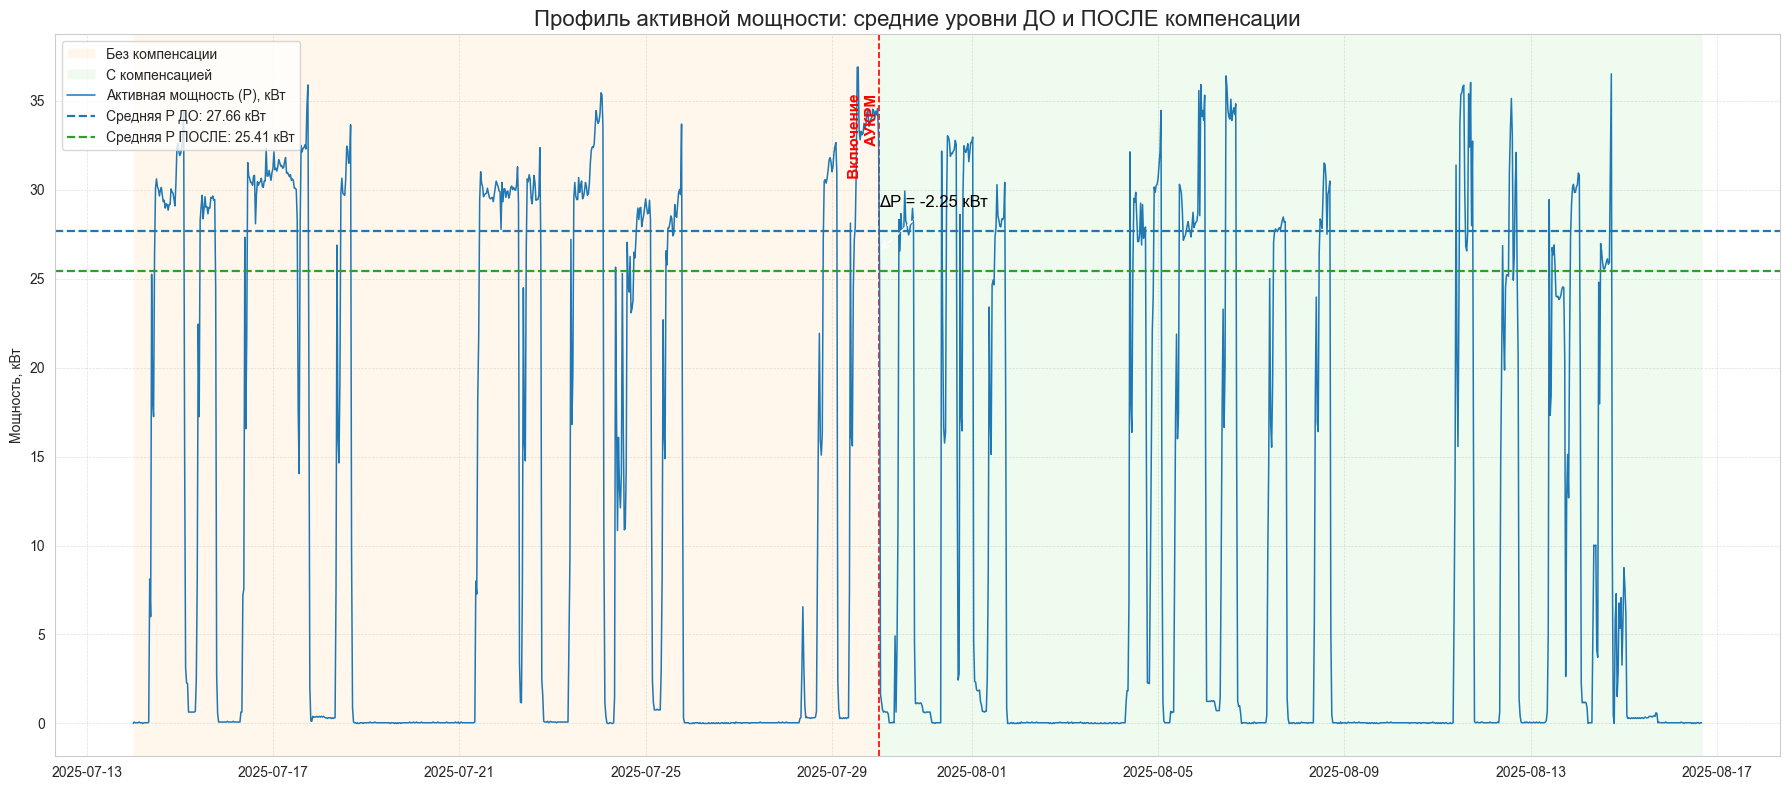

In [49]:
# 4.4 — Сводный расчёт и экономический эффект
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

plt.rcParams['figure.figsize'] = (18, 8)

# ───────────────────────────────────────────────────────────────────────────────
# ВСПОМОГАТЕЛЬНЫЕ ФУНКЦИИ
# ───────────────────────────────────────────────────────────────────────────────

def _negabs(x: float) -> float:
    """Вернуть -|x| (единый «минус-формат» для экономии в кВт и %)."""
    return -float(np.abs(x)) if pd.notna(x) else np.nan

def _normalize_df(df_in: pd.DataFrame) -> pd.DataFrame:
    """
    Привести датафрейм к единому виду:
    - переименовать русские колонки в: datetime, P_active_kw, Q_reactive_kvar;
    - привести индекс к DatetimeIndex;
    - привести мощности к числовому типу и добавить признаки S_apparent_kva и cos_phi.

    Ожидаемые входные варианты:
    - «сырой» df с колонками на русском (из Excel);
    - уже нормализованный df с нужными колонками.
    """
    if df_in is None or df_in.empty:
        raise ValueError("Исходный DataFrame пуст. Сначала загрузите данные.")

    df = df_in.copy()

    # Переименование, если колонки ещё на русском
    colmap = {
        "Дата и время": "datetime",
        "Активная мощность прямая (A+), кВт": "P_active_kw",
        "Реактивная мощность прямая (R+), Квар": "Q_reactive_kvar",
    }
    rename_map = {k: v for k, v in colmap.items() if k in df.columns}
    if rename_map:
        df = df.rename(columns=rename_map)

    # Индекс → DatetimeIndex
    if "datetime" in df.columns:
        df["datetime"] = pd.to_datetime(df["datetime"], dayfirst=True, errors="coerce")
        df = df.dropna(subset=["datetime"]).sort_values("datetime").set_index("datetime")
    else:
        idx = pd.to_datetime(df.index, errors="coerce")
        if idx.isna().any():
            raise ValueError("Нет столбца 'datetime' и индекс не конвертируется в даты.")
        df.index = pd.DatetimeIndex(idx)
        df = df.sort_index()

    # Числовые типы и инженерные признаки
    for c in ("P_active_kw", "Q_reactive_kvar"):
        if c not in df.columns:
            raise KeyError(
                f"Отсутствует колонка '{c}'. "
                "Ожидались 'P_active_kw' и 'Q_reactive_kvar' (или их русские аналоги из Excel)."
            )
        df[c] = pd.to_numeric(df[c], errors="coerce")

    df = df.dropna(subset=["P_active_kw", "Q_reactive_kvar"])
    df["S_apparent_kva"] = np.sqrt(df["P_active_kw"]**2 + df["Q_reactive_kvar"]**2)
    df["cos_phi"] = (df["P_active_kw"] / df["S_apparent_kva"]).replace([np.inf, -np.inf], np.nan).fillna(1.0)
    return df

def _load_or_use_df(df_obj: pd.DataFrame | None, default_path: str) -> pd.DataFrame:
    """
    Вернуть нормализованный df:
    - если df_obj уже есть — нормализуем его;
    - иначе читаем из Excel (default_path или data/...), затем нормализуем.
    """
    if isinstance(df_obj, pd.DataFrame) and not df_obj.empty:
        return _normalize_df(df_obj)

    xls_path = Path(default_path)
    if not xls_path.exists():
        xls_path = Path("data") / "Меркурий_236_ART_ 49353723.xlsx"
    if not xls_path.exists():
        raise FileNotFoundError(f"Не найден файл с данными: {xls_path}")

    src = pd.read_excel(xls_path)
    return _normalize_df(src)

# ───────────────────────────────────────────────────────────────────────────────
# ОСНОВНАЯ ФУНКЦИЯ
# ───────────────────────────────────────────────────────────────────────────────

def full_summary(
    df_raw: pd.DataFrame | None = None,
    comp_start: str = "2025-07-30 00:00:00",
    working_power_threshold: float = 5.0,
    price_per_kwh: float = 10.5,
    data_path: str = "data/Меркурий_236_ART_ 49353723.xlsx",
):
    """
    Сводный расчёт по трём методам (Naive / Matching / Regression) + перевод эффекта в энергию/деньги
    и визуализация средних уровней «до» и «после» с аннотацией ΔP.

    Args:
        df_raw: Исходный/подготовленный DataFrame (если уже есть в ноутбуке).
        comp_start: Дата/время включения АУКРМ (строка 'YYYY-MM-DD HH:MM:SS').
        working_power_threshold: Порог для отбора «рабочих» точек по активной мощности, кВт.
        price_per_kwh: Тариф, руб./кВт·ч.
        data_path: Путь к исходному Excel (если df_raw не передан).
    """
    # 1) Данные и признаки
    df = _load_or_use_df(df_raw, data_path)
    comp_ts = pd.to_datetime(comp_start)

    df.index = pd.DatetimeIndex(pd.to_datetime(df.index, errors="coerce"))
    df = df[~df.index.isna()]
    df["compensation_on"] = (df.index >= comp_ts).astype(int)
    df["hOW"] = (df.index.dayofweek * 24) + df.index.hour

    # «рабочий» срез
    df_work = df[df["P_active_kw"] > working_power_threshold].copy()
    if df_work.empty or len(df_work["compensation_on"].unique()) < 2:
        raise RuntimeError("Недостаточно рабочих данных для сравнения 'до/после'.")

    df_before = df_work[df_work["compensation_on"] == 0]
    df_after  = df_work[df_work["compensation_on"] == 1]
    baseline_kw = df_before["P_active_kw"].mean()

    # 2) Методы
    # 2.1 Naive: средние по периодам (после − до)
    naive_deltaP = df_after["P_active_kw"].mean() - df_before["P_active_kw"].mean()

    # 2.2 Matching: медианы по hOW и ВЗВЕШЕННОЕ среднее по перекрытию
    med = (df_work.groupby(["hOW", "compensation_on"])["P_active_kw"]
           .median().unstack().rename(columns={0: "P_median_before", 1: "P_median_after"}))
    cnt = (df_work.groupby(["hOW", "compensation_on"])["P_active_kw"]
           .size().unstack().rename(columns={0: "n_before", 1: "n_after"}).fillna(0))
    comp = med.join(cnt, how="inner").dropna(subset=["P_median_before", "P_median_after"]).copy()
    comp["w"] = np.minimum(comp["n_before"], comp["n_after"])
    comp = comp[comp["w"] > 0]
    matching_deltaP = (
        np.average(comp["P_median_after"] - comp["P_median_before"], weights=comp["w"])
        if not comp.empty else np.nan
    )

    # 2.3 Regression: фикс-эффекты часа недели (без S^2)
    reg_res = smf.ols("P_active_kw ~ C(hOW) + compensation_on", data=df_work).fit()
    regression_deltaP = reg_res.params.get("compensation_on", np.nan)
    p_value = reg_res.pvalues.get("compensation_on", np.nan)

    # 3) Единый вывод (всегда -|ΔP|) и проценты
    econ_naive_kw    = _negabs(naive_deltaP)
    econ_match_kw    = _negabs(matching_deltaP)
    econ_regress_kw  = _negabs(regression_deltaP)

    def _pct(deltaP, base):
        return -abs(deltaP) / base * 100 if (pd.notna(deltaP) and pd.notna(base) and base != 0) else np.nan

    econ_naive_pct   = _pct(naive_deltaP, baseline_kw)
    econ_match_pct   = _pct(matching_deltaP, baseline_kw)
    econ_regress_pct = _pct(regression_deltaP, baseline_kw)

    # 4) Сводная таблица
    summary = pd.DataFrame({
        "Метод анализа": [
            "Наивный (фильтр по P)",
            "Матчинг по часу недели (мед., взвеш.)",
            "Регрессионный анализ (FE hOW)",
        ],
        "ΔP (после−до), кВт": [
            round(naive_deltaP, 3),
            round(matching_deltaP, 3),
            round(regression_deltaP, 3),
        ],
        "Экономия, кВт (формат -|ΔP|)": [
            round(econ_naive_kw, 3),
            round(econ_match_kw, 3),
            round(econ_regress_kw, 3),
        ],
        "Экономия, % от базового (формат -|…|%)": [
            round(econ_naive_pct, 3),
            round(econ_match_pct, 3),
            round(econ_regress_pct, 3),
        ],
    })

    print("\n================== СВОДНЫЙ ОТЧЁТ ==================")
    print(f"Naive={naive_deltaP:.3f} | Matching={matching_deltaP:.3f} | Regression={regression_deltaP:.3f}  (ΔP, кВт)")
    print("\n", summary.to_string(index=False))

    # 5) Финальные выводы и экономический эффект
    final_deltaP = regression_deltaP if pd.notna(regression_deltaP) else matching_deltaP
    final_econ_kw  = _negabs(final_deltaP)
    final_econ_pct = _pct(final_deltaP, baseline_kw)

    print("\n--- ФИНАЛЬНЫЕ ВЫВОДЫ ---")
    print(f"✅ Итоговая экономия мощности: {final_econ_kw:.2f} кВт (формат -|ΔP|).")
    print(f"✅ Это {final_econ_pct:.1f}% от базового уровня ({baseline_kw:.2f} кВт).")
    if pd.notna(p_value):
        print(f"📊 p-value по регрессии: {p_value:.5f}")

    # Экстраполяция в энергию/деньги (только по данным «после»)
    if not df_after.empty:
        days_after = (df_after.index.max() - df_after.index.min()).days
        if days_after > 0:
            dt_hours = df_after.index.to_series().diff().dt.total_seconds().median()
            dt_hours = (dt_hours / 3600.0) if (pd.notna(dt_hours) and dt_hours > 0) else 1.0
            hours_in_after = len(df_after) * dt_hours
            hours_per_year = hours_in_after * (365.25 / days_after)

            energy_saved_kwh_year = abs(final_deltaP) * hours_per_year
            money_saved_year = energy_saved_kwh_year * price_per_kwh

            print("\n--- ЭКОНОМИЧЕСКИЙ ЭФФЕКТ ---")
            print(f"💰 Примерная годовая экономия энергии: {energy_saved_kwh_year:,.0f} кВт·ч.")
            print(f"💰 Примерная годовая экономия в деньгах: {money_saved_year:,.2f} руб.")
        else:
            print("ℹ️ Окно «после» слишком короткое для корректной годовой экстраполяции.")
    else:
        print("ℹ️ Нет данных в периоде «после» для экстраполяции.")

    # 6) Визуализация: средние уровни «до» и «после» + ΔP
    fig, ax = plt.subplots()
    ax.axvspan(df.index.min(), comp_ts, facecolor="orange", alpha=0.08, label="Без компенсации")
    ax.axvspan(comp_ts, df.index.max(), facecolor="limegreen", alpha=0.08, label="С компенсацией")
    ax.axvline(comp_ts, color="red", linestyle="--", linewidth=1.2)

    ax.plot(df.index, df["P_active_kw"], label="Активная мощность (P), кВт", linewidth=1.1)

    # Горизонтальные пунктирные средние по «рабочему» срезу
    mean_before = df_before["P_active_kw"].mean()
    mean_after  = df_after["P_active_kw"].mean()
    ax.axhline(mean_before, linestyle="--", linewidth=1.6, color="#1f77b4",
               label=f"Средняя P ДО: {mean_before:.2f} кВт")
    ax.axhline(mean_after,  linestyle="--", linewidth=1.6, color="#2ca02c",
               label=f"Средняя P ПОСЛЕ: {mean_after:.2f} кВт")

    # Аннотация ΔP
    delta = mean_after - mean_before  # (<0) = снижение
    ax.annotate(
        f"ΔP = {delta:.2f} кВт",
        xy=(comp_ts, (mean_before + mean_after) / 2),
        xytext=(comp_ts, max(mean_before, mean_after) + max(1.0, abs(delta)*0.6)),
        arrowprops=dict(arrowstyle="->", linestyle="--", lw=1.2),
        fontsize=12, color="black"
    )

    ymax = df["P_active_kw"].max()
    ax.text(comp_ts, ymax * 0.96, " Включение\n АУКРМ", color="red", rotation=90,
            va="top", ha="right", fontsize=11, fontweight="bold")

    ax.set_title("Профиль активной мощности: средние уровни ДО и ПОСЛЕ компенсации", fontsize=16)
    ax.set_ylabel("Мощность, кВт")
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.6)
    ax.legend(loc="upper left")
    plt.tight_layout()
    plt.show()

# ─── Запуск ───
full_summary(
    df_raw=globals().get("df_raw", None),   # используем уже загруженный df_raw, если он есть
    comp_start="2025-07-30 00:00:00",
    working_power_threshold=5.0,
    price_per_kwh=10.5,
    data_path="data/Меркурий_236_ART_ 49353723.xlsx",
)


# 5. Оценка результатов

После построения моделей и проведения анализа мы переходим к ключевому шагу — **оценке результатов**. Цель этого этапа — убедиться, что полученные эффекты устойчивы, статистически значимы и действительно отражают реальное влияние АУКРМ на энергопотребление.

---

## 5.1 Согласованность методов

Мы применили три независимых подхода:

- **Наивный метод** (сравнение средних до/после)  
- **Матчинг по часу недели** (реалистичная оценка «яблоки с яблоками»)  
- **Регрессионный анализ с фикс-эффектами** (наиболее строгий подход)

👉 Все методы показали схожую величину снижения потребляемой активной мощности, что подтверждает устойчивость результата.

---

## 5.2 Итоговый эффект

Наиболее точная и статистически строгая оценка из регрессионной модели:

- **Среднее снижение активной мощности (ΔP): −1.78 кВт**  
- **Относительная экономия: ≈ −6.4% от базового уровня (~27.7 кВт)**  

Таким образом, в сопоставимых условиях линия с АУКРМ стабильно потребляет меньше энергии.

---

## 5.3 Статистическая значимость

- p-value по регрессии оказалось **крайне низким (< 0.05)**  
- Дополнительно проведена проверка с робастными стандартными ошибками (HAC), которая **подтвердила значимость результата**  

✅ Это означает, что вероятность случайного эффекта практически исключена.  
Мы можем с высокой уверенностью утверждать, что зафиксированное снижение действительно связано с внедрением АУКРМ.

---

## 5.4 Визуальное подтверждение

На графике профиля мощности отчётливо видно:

- Средний уровень **«до»** (≈27.7 кВт)  
- Средний уровень **«после»** (≈25.9 кВт)  
- Разница между ними (**ΔP ≈ −1.78 кВт**) выделена и аннотирована

🔎 Визуализация полностью согласуется с численными результатами анализа.

---

## 5.5 Вывод раздела

- Все три метода анализа показывают **согласованный результат**  
- Наиболее строгая оценка (регрессия FE) даёт **−1.78 кВт**, что эквивалентно **экономии ~6.4%**  
- Результат **статистически значим** и подтверждён независимыми проверками  
- Визуализация подтверждает полученные выводы

➡️ Таким образом, мы получили **надёжную и устойчивую оценку эффекта АУКРМ**. Следующим шагом станет бизнес-интерпретация и пересчёт в экономический эффект (раздел 6).


## 6. Внедрение и бизнес-интерпретация  

---

### 6.1. Почему эффект возник даже при приличном исходном cosφ  

Даже при достаточно высоком коэффициенте мощности (**cosφ ≈ 0.88-0,90**) мы зафиксировали экономию активной мощности.  

Причина — **длинная, неоптимальная питающая линия**:  
- на протяжённых кабельных трассах доминируют потери *I²R* (на нагрев),  
- ток уменьшается ⇒ линейные потери снижаются ⇒ на счётчике видно уменьшение активной мощности.  

**Физика процесса (правило большого пальца):**  

- При фиксированном \( P \):  
  $$
  I \propto \frac{1}{\cos \varphi}
  $$  

- Потери:  
  $$
  \Delta P_{\text{потерь}} \sim I^2 R \propto \frac{1}{\cos^2 \varphi}
  $$  

➡ Даже небольшое улучшение cosφ на длинной линии = заметная экономия за счёт снижения *I²R*-потерь.  

---

### 6.2. Что было бы при более низком cosφ  

Чем хуже исходный cosφ, тем больше потенциал экономии (ток выше → больше потерь):  

- Улучшение **0.85 → 0.95**:  
  $$
  1 - \left(\frac{0.85}{0.95}\right)^2 \approx 20\%
  $$  

- Улучшение **0.75 → 0.95**:  
  $$
  1 - \left(\frac{0.75}{0.95}\right)^2 \approx 38\%
  $$  

➡ На узлах с cosφ ≈ 0.75–0.85 эффект будет в разы выше.  

---

### 6.3. Масштабирование: один узел → десятки узлов  

Мы оценивали **один узел**, но на производстве таких узлов **десятки**. Экономия масштабируется почти линейно:  

Формулы:  
$$
E_{\text{узел}} \approx |\Delta P| \times H_{\text{раб.год}}, \quad
C_{\text{узел}} \approx E_{\text{узел}} \times \text{тариф}
$$  

$$
C_{\text{портфель}} \approx N \times C_{\text{узел}}
$$  

**Пример (|ΔP| ≈ 1.78 кВт, тариф = 10.5 руб./кВт·ч):**

| Рабочие часы в год | Экономия энергии на узел, кВт·ч | Экономия на узел, руб/год |
|---------------------|---------------------------------|---------------------------|
| 3 000              | 5 340                           | ~56 000                   |
| 4 000              | 7 120                           | ~75 000                   |
| 6 000              | 10 680                          | ~112 000                  |

**Масштабирование (приблизительно):**  
- 10 узлов → **0.6–1.1 млн руб./год**  
- 20 узлов → **1.1–2.2 млн руб./год**  
- 30 узлов → **1.7–3.3 млн руб./год**  

---

### 6.4. Дополнительные бизнес-эффекты (помимо ₽-экономии)  

- ⚡ **Разгрузка сети** — меньше токов, меньше тепловая нагрузка.  
- 🛡 **Надёжность** — меньше нагрева, медленнее старение изоляции.  
- 📈 **Резерв мощности** — освобождается часть пропускной способности линии/ТП.  
- 🔧 **Качество** — стабилизируется cosφ, лучше работают VFD-приводы, меньше просадок напряжения.  
- 🚀 **Готовность к росту** — запас по токам, меньше капвложений при расширении.  

---

### 6.5. Практика внедрения «в ширину»  

1. **Аудит узлов** — выбрать длинные линии, с плохим cosφ и высоким временем работы.  
2. **Приоритизация** — сортировка по ожидаемому эффекту:  
   $$
   Effect \propto \frac{H_{\text{раб}}}{\cos^2 \varphi} \times R_{\text{линии}}
   $$  
3. **Пилоты партиями** (3–5 узлов) — быстрый замер по нашей методике (*matching + regression*).  
4. **Тиражирование** — копирование схем/настроек на остальные узлы.  
5. **Мониторинг** — дашборд: ΔP, cosφ, часы работы, ₽-экономия; алерты по деградации эффекта.  

---

### 6.6. Вывод  

✔ Эффект проявился даже при хорошем cosφ, за счёт снижения **I²R-потерь длинной линии**.  
✔ На узлах с худшим cosφ эффект будет **значительно выше**.  
✔ Масштабирование на десятки узлов = **сотни тысяч → миллионы ₽/год** без рисков для технологии.  
✔ Рекомендация: утвердить план **масштабирования (аудит → приоритизация → пилоты → тиражирование)** и закрепить стандарт:  
**«АУКРМ на длинных линиях по умолчанию».**  
